In [2]:
# building the dataset
import torch

def make_cat_pattern():
  pattern = torch.tensor([
        [0,0,1,1,1,0,0],
        [0,1,1,1,1,1,0],
        [1,1,1,1,1,1,1],
        [1,1,1,1,1,1,1],
        [1,1,1,1,1,1,1],
        [0,1,1,0,1,1,0],
        [0,0,1,0,1,0,0],
  ] ,dtype = torch.float32)
  return pattern

In [3]:
# generating one sample
import random
def generate_sample (H,W,cat_pattern,max_cats = 4):
  x = torch.zeros(H,W)
  y = torch.zeros(H,W)
  k = cat_pattern.shape[0]
  pad = k//2
  num_cats = random.randint(1,max_cats)

  for _ in range(num_cats):
    i = random.randint(pad,H-pad-1)
    j = random.randint(pad,W-pad-1)
    x[i-pad:i+pad+1,j-pad:j+pad+1] = cat_pattern
    y[i,j] = 1

  return x,y



In [4]:
from torch.utils.data import Dataset
class CatcentreDataset(Dataset):
  def __init__(self,num_samples=100,H=64,W=64):
    self.num_samples = num_samples
    self.H = H
    self.W = W
    self.cat_pattern = make_cat_pattern()

  def __len__(self):
    return self.num_samples

  def __getitem__(self,idx):
    x,y = generate_sample(self.H,self.W,self.cat_pattern)
    x = x.unsqueeze(0)
    y = y.unsqueeze(0)
    return x,y


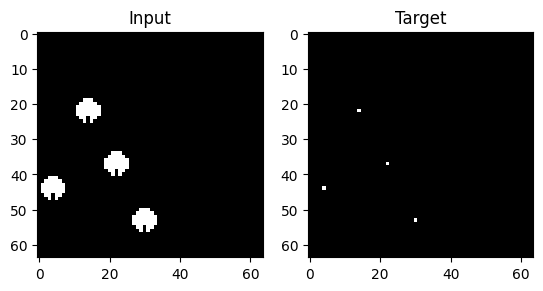

In [8]:
#checking
import matplotlib.pyplot as plt
ds = CatcentreDataset(num_samples=1)
x,y = ds[0]

plt.subplot(1,2,1)
plt.title('Input')
plt.imshow(x[0],cmap = "gray")
plt.subplot(1,2,2)
plt.title('Target')
plt.imshow(y[0],cmap = "gray")
plt.show()

In [9]:
# model
import torch.nn as nn

class MyNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.c1 = nn.Conv2d(1,8,kernel_size=7,padding=3)
    self.c2 = nn.Conv2d(8,1,kernel_size=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    x1 = self.c1(x)
    x2 = self.relu(x1)
    x = x1 + x2
    x = self.c2(x)
    return x


In [15]:
# model training
from torch.utils.data import DataLoader

dataset = CatcentreDataset(num_samples=250)
loader = DataLoader(dataset,batch_size=8,shuffle=True)
model = MyNN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

for epoch in range(30):
  total_loss = 0
  for x,y in loader:
    out = model(x)
    loss = torch.sum((out-y)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  print(f"Epoch {epoch+1} , Loss = {total_loss:.2f}")

Epoch 1 , Loss = 3390.74
Epoch 2 , Loss = 971.30
Epoch 3 , Loss = 689.75
Epoch 4 , Loss = 544.59
Epoch 5 , Loss = 451.12
Epoch 6 , Loss = 361.57
Epoch 7 , Loss = 312.68
Epoch 8 , Loss = 278.01
Epoch 9 , Loss = 257.12
Epoch 10 , Loss = 231.56
Epoch 11 , Loss = 201.55
Epoch 12 , Loss = 189.26
Epoch 13 , Loss = 183.09
Epoch 14 , Loss = 166.76
Epoch 15 , Loss = 158.56
Epoch 16 , Loss = 136.35
Epoch 17 , Loss = 130.25
Epoch 18 , Loss = 125.26
Epoch 19 , Loss = 112.25
Epoch 20 , Loss = 104.32
Epoch 21 , Loss = 107.53
Epoch 22 , Loss = 98.19
Epoch 23 , Loss = 93.66
Epoch 24 , Loss = 91.14
Epoch 25 , Loss = 80.76
Epoch 26 , Loss = 79.54
Epoch 27 , Loss = 76.38
Epoch 28 , Loss = 66.02
Epoch 29 , Loss = 66.58
Epoch 30 , Loss = 63.13


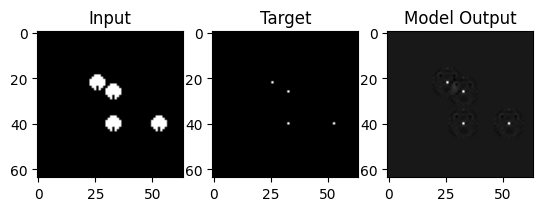

In [19]:
#verification
x,y = dataset[0]
with torch.no_grad():
  out = model(x.unsqueeze(0))
plt.subplot(1,3,1)
plt.title("Input")
plt.imshow(x[0], cmap="gray")

plt.subplot(1,3,2)
plt.title("Target")
plt.imshow(y[0], cmap="gray")

plt.subplot(1,3,3)
plt.title("Model Output")
plt.imshow(out[0,0], cmap="gray")
plt.show()
